# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [20]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [3]:
# MANUALLY put in the data
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y':[10,1,5,9,4,2,9,6,0,3]})
student_data

X   Y
0  17  10
1  51   1
2  27   5
3  21   9
4  36   4
5  48   2
6  19   9
7  26   6
8  54   0
9  30   3

Draw a dispersion diagram (scatter plot) for the data.

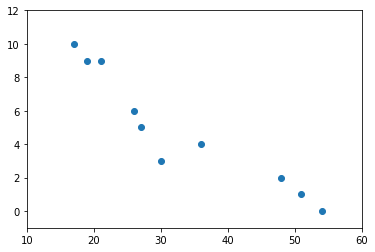

In [10]:
# Your code here.
plt.scatter(student_data['X'], student_data['Y'])
plt.xlim([10,60])
plt.ylim([-1,12])
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# We can see that there's a downward trend (negative relationship)
# The more older the person is, the less likely they are to be late to class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [13]:
# Your response here.
#correlation:
# pearson correlation
print(np.corrcoef(student_data['X'], student_data['Y']))

#covariance:
print(np.cov(student_data['X'], student_data['Y']))

[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


In [ ]:
""" 
the correlation = -0.939, the value is negative and almost close to -1 which means that it is strongly negatively correlated
the covariance = -45.56 the value is negative, which means that as one increases, the other decreases 
"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [16]:
# using linear regression model
x = student_data[['X']] # independent 
y = student_data['Y'] # dependent

model = linear_model.LinearRegression()
result = model.fit(x,y)

print(result.intercept_) # also called constant
print(result.coef_)

# 12.88 is the expected mean value of Y when all X = 0 
# on every point the age increases, the chance of being late decreases -0.24

12.888803363135771
[-0.24282077]


Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

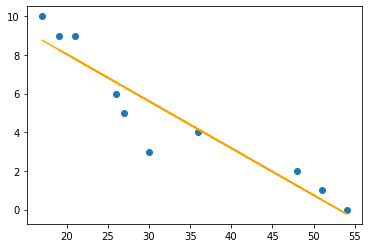

In [17]:
regression_line = result.intercept_ + result.coef_ *x

plt.scatter(x,y)
plt.plot(x, regression_line, c='orange')
plt.show()
# the line gives you what is expected (prediction)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [21]:
# compare the prediction result to the actual y value
print(mean_squared_error(result.predict(x), y))

# in mean there's a difference of 1.15 points from prediction to the real value
print(np.sqrt(mean_squared_error(result.predict(x), y)))

# the predictive power is 88%
print(result.score(x,y))

1.3319201847356268
1.1540884648655088
0.8820265558250109


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [22]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

Make                Model  Year  Engine Displacement  \
0        AM General    DJ Po Vehicle 2WD  1984                  2.5   
1        AM General     FJ8c Post Office  1984                  4.2   
2        AM General  Post Office DJ5 2WD  1985                  2.5   
3        AM General  Post Office DJ8 2WD  1985                  4.2   
4  ASC Incorporated                  GNX  1987                  3.8   

   Cylinders     Transmission        Drivetrain                Vehicle Class  \
0        4.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
1        6.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
2        4.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
3        6.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
4        6.0  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars   

  Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0   Regular          19.388824        18           17            17   
1   Regular          25.354615        13           13            13   
2   Regular          20.600625        16           17            16   
3   Regular          25.354615        13           13            13   
4   Premium          20.600625        14           21            16   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550  
2               555.437500            2100  
3               683.615385            2550  
4               555.437500            2550

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [26]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']] # independent 
y = vehicles['CO2 Emission Grams/Mile'] # dependent

X.corrwith(y)

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

In [ ]:
""" 
most correlated variable: Fuels Barrels/Year
least correlated: Year
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [29]:
# multilinear regression
model = linear_model.LinearRegression()
result = model.fit(X,y)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [30]:
print(result.intercept_) 
print(result.coef_)

# 769.88 is the expected mean value of Y when all X = 0 
# on every point the Fuel Barrels/Year increases, the CO2 Emission Grams/Mile increases 19.05 

769.8882836465405
[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [45]:
# Manually put the data (again)
party = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})
party

X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

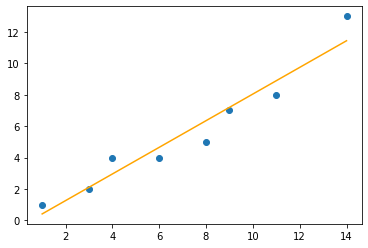

In [46]:
# Your code here.
X = party[['X']]
y = party['Y']

model = linear_model.LinearRegression()
result = model.fit(X,y)
regression_line = result.intercept_ + result.coef_[0] *X

plt.scatter(X,y)
plt.plot(X, regression_line, c='orange')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [47]:
print(result.intercept_)
print(result.coef_)

# -0.43 is the expected mean value of Y when all X = 0 
# on every person invited, 0.84 person is coming 
# lol 

-0.43939393939393767
[0.84848485]


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

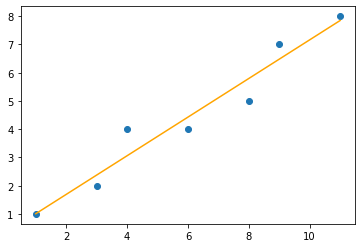

In [52]:
# getting rid of outliers
new_party = party.drop([7])

X = new_party[['X']]
y = new_party['Y']

model = linear_model.LinearRegression()
result = model.fit(X,y)
regression_line = result.intercept_ + result.coef_[0] *X

plt.scatter(X,y)
plt.plot(X, regression_line, c='orange')
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# When we remove the outliers, we can see more clearly how far away or close the points are from the predictive line.